# 20 Game Averages
-------------------------------------------------

- For now I'm thinking first 20 games (ppg), middle 20 games ppg, last 20 games ppg
- Future, top 10 hightest scoring games for the players season
- Future, times shot > 35% 3pfg% && 3pgfa >= 5 or 6
- 11/26/21 -- Decided to pull assists and rebounds to be used on the 20 game averages

Total Games Played: 27
[25, 27, 29, 30, 30, 31, 32, 33, 34, 35]


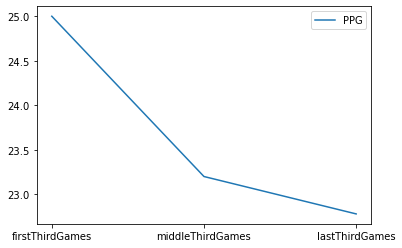

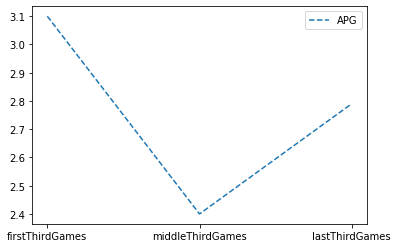

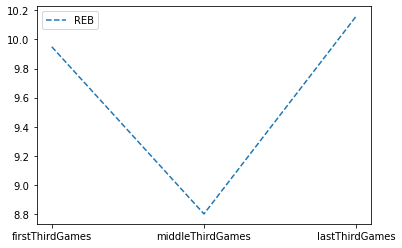

                    PPG   APG    RPG
firstThirdGames   25.00  3.10   9.95
middleThirdGames  23.20  2.40   8.80
lastThirdGames    22.78  2.79  10.16


In [88]:
# obtain dataframe
import statistics as stats
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np


def csv_to_df(csv):
    player_season_df = pd.read_csv(csv)
    return player_season_df

def player_season_dataframe(player_df):
    player_season = player_df
    
    return player_season

def player_points(player_season):
    points_list = player_season["PTS"].tolist()
    
    return points_list

def player_assists(player_season):
    assists_list = player_season["AST"].tolist()
    
    return assists_list

def player_rebounds(player_season):
    rebounds_list = player_season["REB"].tolist()
    
    return rebounds_list
    
def firstPPG(points_list):
    games_played = len(points_list)
    min_allowedPlayed = 6
    firstIndex = math.ceil(len(points_list)/3)
    
    if games_played >= min_allowedPlayed:
        first_twenty = "{:.2f}".format(stats.mean(points_list[0:firstIndex]))
    else:
        print("Not Enough Games Played")
    
    return first_twenty
    
def secondPPG(points_list):
    # Used this to round up if necessary for season length half point
    # 10 previous games and next 10 games from midpoint
    games_played = len(points_list)
    min_allowedPlayed = 6
    if games_played >= min_allowedPlayed:
        middle_index = math.ceil(len(points_list)/2)
        start_of_middleIndex = math.ceil(len(points_list)/3)
        diff = middle_index-start_of_middleIndex
        middle_twenty = "{:.2f}".format(stats.mean(points_list[start_of_middleIndex:middle_index+diff]))
    else:
        print("Not Engough Games Played")
    
    return middle_twenty
    
def thirdPPG(points_list):
    games_played = len(points_list)
    middle_index = math.ceil(len(points_list)/2)
    start_of_middleIndex = math.ceil(len(points_list)/3)
    diff = middle_index-start_of_middleIndex
    last_twenty = "{:.2f}".format(stats.mean(points_list[-(middle_index+diff):-1]))
    
    return last_twenty
    
# Top 10 scoring totals of season
def top_ten_gamesPPG(points):
    min_10games = len(points_list)
    
    ascending_list = sorted(points)
    top_10 = ascending_list[-len(points_list):]
    
    return top_10
    
    
def firstAPG(assists_list):
    first_twentyAPG = "{:.2f}".format(stats.mean(assists_list[0:21]))
    
    return first_twentyAPG
    
def secondAPG(assists_list):
    middle_index = math.ceil(len(assists_list))
    middle_twentyAPG = "{:.2f}".format(stats.mean(assists_list[middle_index-10:middle_index+10]))
    
    return middle_twentyAPG
    
    
def thirdAPG(assists_list):
    last_twentyAPG = "{:.2f}".format(stats.mean(assists_list[-20:-1]))
    
    return last_twentyAPG


def firstRPG(rebounds_list):
    first_20RPG = "{:.2f}".format(stats.mean(rebounds_list[0:21]))
    
    return first_20RPG

def secondRPG(rebounds_list):
    middle_index = math.ceil(len(rebounds_list))
    middle_20RPG = "{:.2f}".format(stats.mean(rebounds_list[middle_index-10:middle_index+10]))
    
    return middle_20RPG

def thirdRPG(rebounds_list):
    
    last_20RPG = "{:.2f}".format(stats.mean(rebounds_list[-20:-1]))
    
    return last_20RPG


def print_statline(f_20totalavrgs,m_20totalavrgs,l_20totalavrgs):
    # Lets make a df out of parameters and add row indeces to be 
    # strings of 20 stretch avrg names
    
    section_stretchAvrgs = ["firstThirdGames","middleThirdGames","lastThirdGames"]
    df = pd.DataFrame(
        [f_20totalavrgs,
        m_20totalavrgs,
        l_20totalavrgs],
        columns=["PPG","APG","RPG"])
    
    pts = df['PPG'].tolist()
    ast = df['APG'].tolist()
    reb = df['RPG'].tolist()

    # The reason my first plot was out of order was due to the elements in list
    # being of type String, needed to convert to float
    pts = [float(p) for p in pts]
    ast = [float(a) for a in ast]
    reb = [float(r) for r in reb]
    plt.plot(section_stretchAvrgs,pts,label = "PPG", linestyle="-")
    plt.legend()
    plt.show()
    
    plt.plot(section_stretchAvrgs,ast, label = "APG", linestyle="--")
    plt.legend()
    plt.show()
    
    plt.plot(section_stretchAvrgs,reb, label = "REB", linestyle ="--")
    plt.legend()
    plt.show()
    
    df.index = section_stretchAvrgs
    print(df)
    return df
    
    
# create points list    
p_df = csv_to_df('AnthonyDavisYear2022')
points = player_points(p_df)
assists = player_assists(p_df)
rebounds = player_rebounds(p_df)
print("Total Games Played: " + str(len(points)))

# First 20 game averages
first_20_points = firstPPG(points)
first_20_assists = firstAPG(assists)
first_20_rebounds = firstRPG(rebounds)

# Middle 20 averages
middle_20_points = secondPPG(points)
middle_20_assists = secondAPG(assists)
middle_20_rebounds = secondRPG(rebounds)


# Last 20 game averages
last_20_points = thirdPPG(points)
last_20_assists = thirdAPG(assists)
last_20_rebounds = thirdRPG(rebounds)


def first_total_stretchAvrgs(f_20ppg,f_20apg,f_20rpg):
    f_t20avg = [f_20ppg,f_20apg,f_20rpg]

    return f_t20avg

def second_total_stretchAvrgs(m_20ppg,m_20apg,m_20rpg):
    m_t20avg = [m_20ppg,m_20apg,m_20rpg]
    
    return m_t20avg

def third_total_stretchAvrgs(l_20ppg,l_20apg,l_20rpg):
    l_t20ppg = [l_20ppg,l_20apg,l_20rpg]
    
    return l_t20ppg


top_10 = top_ten_games(points)


ftsa = first_total_stretchAvrgs(first_20_points,first_20_assists,first_20_rebounds)
stsa = second_total_stretchAvrgs(middle_20_points,middle_20_assists,middle_20_rebounds)
ttsa = third_total_stretchAvrgs(last_20_points,last_20_assists,last_20_rebounds)

prt_statline = print_statline(ftsa,stsa,ttsa)